In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier #Tuning DTC
from sklearn.ensemble import RandomForestClassifier #Tuning RFC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('uci breast cancer dataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop(['id','Unnamed: 32'], axis = 'columns')

In [6]:
df #30 features and 1 class (diagnosis). Total 570 samples.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: xlabel='diagnosis', ylabel='count'>

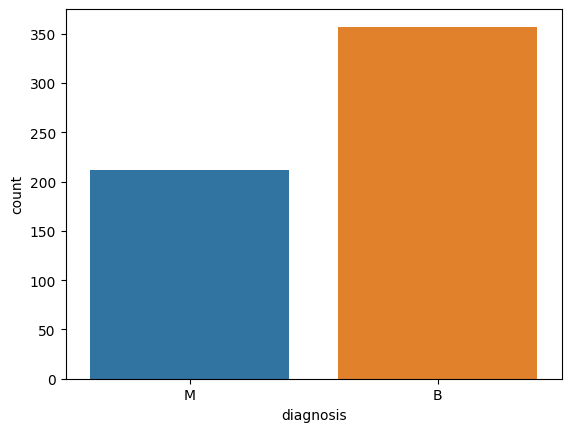

In [7]:
sns.countplot(x='diagnosis',data=df)

In [8]:
df.diagnosis.value_counts() #B->Benign, M->Malignant.

B    357
M    212
Name: diagnosis, dtype: int64

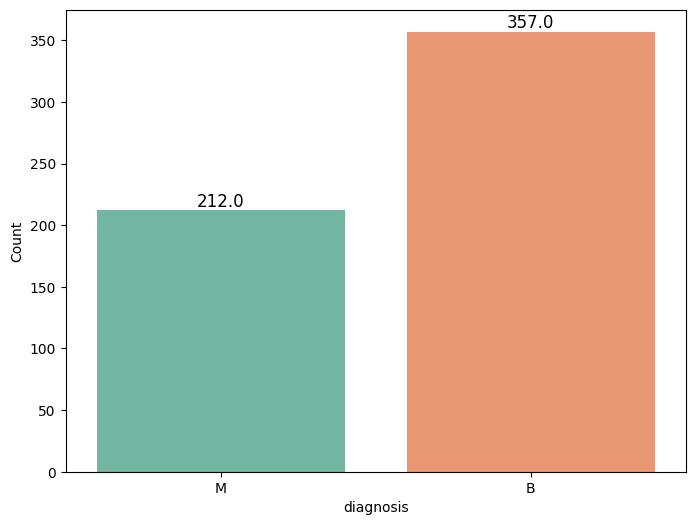

In [9]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=df, palette='Set2')

# Annotate the bars with their respective counts
for p in ax.patches:
    height = p.get_height() #After counting the values of B and M, those values will be kept in 'height'.
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12) #ha->horizontal allignment.

# Optionally, you can set the y-axis label
plt.ylabel('Count')

# Show the plot
plt.show()


In [10]:
x = df.drop('diagnosis',axis=1)

In [11]:
y = df[['diagnosis']]

**Train Test Split**

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=42, test_size=.30)

In [13]:
ytest

,diagnosis
204,B
70,M
131,M
431,B
540,B
...,...
69,B
542,B
176,B
501,M


In [14]:
ytest.shape

(171, 1)

In [15]:
xtest.shape

(171, 30)

**Step 3: Decision Tree model and evaluation**

In [16]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(xtrain, ytrain)
y_pred_dt = dt_model.predict(xtest)

In [17]:
y_pred_dt

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

**Evaluate Decision Tree model performance**

In [18]:
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_dt))

Decision Tree Model Performance:
Accuracy: 0.9415204678362573 

Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.94      0.95       108
           M       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



**Step 4: Random Forest model and evaluation**

In [19]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain, ytrain)
y_pred_rf = rf_model.predict(xtest)

In [20]:
y_pred_rf

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

**Evaluate Random Forest model performance**

In [21]:
print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_rf))


Random Forest Model Performance:
Accuracy: 0.9707602339181286 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



**Pre - Pruning for Cost Complexity**

Initialized Hyperparameters

In [22]:
# Define hyperparameters for Decision Tree
#While doing hyperparameters, take help from scikit-learn and press shift+tab.

dt_params = {                              #a dictionary
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300], ##We can take the value of n_estimator from the user or can generate randomly. #https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# we will have to create a grid of dt_params and rf_params.
# If we keep the max_depth value less, then data will be repeated more. But, if we keep the max_depth value more, then data will be repeated less.

#For rf_params, if n_estimator=100, then cv=5 and 1oo*5=500. In each step, there are 500 iterations. Similarly, if we take 200 steps, then 50000 iterations.



In [23]:
# Perform Grid Search for Decision Tree
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=dt_params, cv=5)
dt_grid_search.fit(xtrain, ytrain)

#cv=5-> the work of dt_grid_search will be done 5 times. It will apply DT 5 times & will calculate those 5 performances in each step. If we do this in 200 iterations, then 200*5=1000 iterations.

# GridSearchCV -> It takes randomly & trains. Otherwise, we will have to create DT many times manually with random values and then we will also have to train manually.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [24]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.00830231, 0.00524035, 0.00838332, 0.00377793, 0.00864773,
        0.0038805 , 0.00770106, 0.00374618, 0.00765948, 0.00359654,
        0.00758028, 0.00398827, 0.00806127, 0.00378413, 0.00719848,
        0.00353675, 0.00724826, 0.00376139, 0.01031113, 0.00395069,
        0.00801988, 0.00411706, 0.00793252, 0.00557442, 0.00804725,
        0.0039372 , 0.00791359, 0.00375481, 0.00768394, 0.00405188,
        0.00898218, 0.00389233, 0.00717454, 0.00368075, 0.00717154,
        0.00384841, 0.00755758, 0.00412436, 0.00772314, 0.00358391,
        0.00835586, 0.00401087, 0.00938249, 0.00423613, 0.00830894,
        0.00387616, 0.00785537, 0.00365062, 0.00752163, 0.00359602,
        0.00725241, 0.00445313, 0.00745463, 0.00352244, 0.00776081,
        0.00373106, 0.00791984, 0.00402756, 0.00773087, 0.00361676,
        0.0077065 , 0.00412345, 0.00838742, 0.0039115 , 0.00747485,
        0.00346532, 0.00728688, 0.00364742, 0.00784097, 0.00352449,
        0.00723572, 0.00362558,

In [25]:
tuning_result_dt_gs = pd.DataFrame(dt_grid_search.cv_results_)
tuning_result_dt_gs

#split0_test_score, split1_test_score, split2_test_score,	split3_test_score,	split4_test_score -> for cross-validation.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008302,0.000977,0.004247,0.000189,gini,None,1,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,117
1,0.005240,0.001336,0.006198,0.002495,gini,None,1,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9375,0.9000,0.9625,0.911392,0.949367,0.932152,0.023284,37
2,0.008383,0.001039,0.004186,0.000138,gini,None,1,5,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9250,0.936709,0.936709,0.919684,0.018414,89
3,0.003778,0.000394,0.003912,0.000144,gini,None,1,5,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9250,0.8875,0.9625,0.924051,0.962025,0.932215,0.028014,21
4,0.008648,0.001476,0.004634,0.000969,gini,None,1,10,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9375,0.8875,0.9250,0.911392,0.924051,0.917089,0.016945,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.005791,0.000456,0.005975,0.000072,entropy,30,4,2,random,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,61
140,0.011155,0.000481,0.006257,0.000233,entropy,30,4,5,best,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.9500,0.8875,0.9625,0.949367,0.924051,0.934684,0.026696,5
141,0.005559,0.000127,0.007263,0.001476,entropy,30,4,5,random,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,61
142,0.011315,0.000260,0.006320,0.000231,entropy,30,4,10,best,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.9250,0.8875,0.9625,0.949367,0.924051,0.929684,0.025681,41


In [26]:
dt_grid_search.best_params_ #clf = dt_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'best'}

**Perform Grid Search for Random Forest**

In [27]:
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_params, cv=5)
rf_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [28]:
rf_grid_search.cv_results_

{'mean_fit_time': array([0.25130472, 0.42197785, 0.6813849 , 0.20562272, 0.41788311,
        0.80983238, 0.2027988 , 0.40468364, 0.61581268, 0.20010576,
        0.49258823, 0.7145658 , 0.20230556, 0.40169177, 0.60091639,
        0.20312014, 0.59159398, 0.6013474 , 0.19739866, 0.39795308,
        0.59514933, 0.23797631, 0.54952259, 0.595017  , 0.19909854,
        0.39562821, 0.59291162, 0.32421627, 0.56062479, 0.70346103,
        0.19702787, 0.4020227 , 0.78807211, 0.20172505, 0.40978613,
        0.58946762, 0.19981246, 0.39292831, 0.77682033, 0.1988935 ,
        0.39078627, 0.58356824, 0.19568319, 0.39088936, 0.77688069,
        0.19171271, 0.38395529, 0.57596784, 0.19022479, 0.41644888,
        0.73731923, 0.19358501, 0.38313179, 0.5751451 , 0.19343677,
        0.45849977, 0.68952875, 0.18970127, 0.3803431 , 0.56816401,
        0.191781  , 0.49088836, 0.66002374, 0.18607044, 0.37981839,
        0.56143637, 0.19404426, 0.48720589, 0.64342728, 0.18662896,
        0.37184987, 0.56719041,

In [29]:
tuning_result_rf_gs = pd.DataFrame(rf_grid_search.cv_results_)
tuning_result_rf_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.251305,0.056690,0.011580,0.002104,gini,None,auto,1,2,100,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9625,0.95,0.9750,0.936709,0.924051,0.949652,0.018059,437
1,0.421978,0.016668,0.017240,0.001246,gini,None,auto,1,2,200,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9625,0.95,0.9750,0.949367,0.936709,0.954715,0.013016,101
2,0.681385,0.070784,0.027392,0.005673,gini,None,auto,1,2,300,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9625,0.95,0.9625,0.949367,0.936709,0.952215,0.009644,225
3,0.205623,0.003817,0.011834,0.002290,gini,None,auto,1,5,100,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9375,0.95,0.9750,0.936709,0.949367,0.949715,0.013841,301
4,0.417883,0.007862,0.018209,0.002331,gini,None,auto,1,5,200,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9375,0.95,0.9625,0.949367,0.949367,0.949747,0.007912,273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,0.589003,0.054418,0.024186,0.002186,entropy,30,log2,4,5,200,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.9625,0.95,0.9625,0.936709,0.936709,0.949684,0.011535,377
644,0.571911,0.008957,0.022235,0.001112,entropy,30,log2,4,5,300,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.9625,0.95,0.9625,0.936709,0.949367,0.952215,0.009644,205
645,0.192539,0.004313,0.010797,0.000309,entropy,30,log2,4,10,100,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.9625,0.95,0.9625,0.936709,0.936709,0.949684,0.011535,377
646,0.385085,0.009195,0.016455,0.000675,entropy,30,log2,4,10,200,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.9625,0.95,0.9625,0.936709,0.936709,0.949684,0.011535,377


In [30]:
rf_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

**Evaluate the optimized models**

In [31]:
# Decision Tree and Grid Search
y_pred_dt_gs = dt_grid_search.predict(xtest)
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_gs))



Decision Tree Grid Search Performance:
Accuracy: 0.9590643274853801
Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.98      0.97       108
           M       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



**Random Forest Grid Search**

In [32]:
y_pred_rf_gs = rf_grid_search.predict(xtest)
print("\nRandom Forest Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_gs))


Random Forest Grid Search Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



**Hyperparameter optimization using Randomized Search**

In [33]:
# Perform Randomized Search for Decision Tree
dt_random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                      param_distributions=dt_params, n_iter=100, cv=5, random_state=42)
dt_random_search.fit(xtrain, ytrain)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [34]:
dt_random_search.cv_results_

{'mean_fit_time': array([0.00387344, 0.00367198, 0.00759282, 0.00379801, 0.00795135,
        0.0078661 , 0.01246047, 0.00581193, 0.01456766, 0.01227884,
        0.00589881, 0.0120604 , 0.01153698, 0.00567689, 0.0115768 ,
        0.01095023, 0.00559454, 0.0054523 , 0.00560584, 0.00634508,
        0.00581737, 0.00559292, 0.01195974, 0.00580626, 0.00628715,
        0.00636659, 0.0053926 , 0.01131229, 0.01122389, 0.01198058,
        0.0078054 , 0.01224575, 0.01108661, 0.01166773, 0.01161642,
        0.00560088, 0.0060863 , 0.01158795, 0.0116159 , 0.00660586,
        0.00916996, 0.00768852, 0.00795527, 0.00737052, 0.00863533,
        0.00790215, 0.00739603, 0.00748696, 0.00423727, 0.00381455,
        0.00353694, 0.00357866, 0.00837512, 0.0035799 , 0.00371757,
        0.00361834, 0.00820551, 0.00714116, 0.00775375, 0.00722156,
        0.00438933, 0.00732503, 0.00787015, 0.00745497, 0.00350046,
        0.00376596, 0.003897  , 0.00713058, 0.00764394, 0.00407414,
        0.00353842, 0.00358787,

In [35]:
tuning_result_dt_rs = pd.DataFrame(dt_random_search.cv_results_)
tuning_result_dt_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003873,0.000359,0.004045,0.000260,random,5,2,20,entropy,"{'splitter': 'random', 'min_samples_split': 5,...",0.9250,0.8875,0.9125,0.898734,0.873418,0.899430,0.018133,98
1,0.003672,0.000192,0.003928,0.000257,random,2,1,10,gini,"{'splitter': 'random', 'min_samples_split': 2,...",0.9375,0.9000,0.9625,0.911392,0.949367,0.932152,0.023284,24
2,0.007593,0.000232,0.004039,0.000290,best,10,2,None,entropy,"{'splitter': 'best', 'min_samples_split': 10, ...",0.9375,0.8875,0.9750,0.949367,0.936709,0.937215,0.028451,1
3,0.003798,0.000350,0.004368,0.000522,random,2,2,10,entropy,"{'splitter': 'random', 'min_samples_split': 2,...",0.9375,0.8875,0.8875,0.936709,0.873418,0.904525,0.027094,93
4,0.007951,0.000453,0.004205,0.000203,best,5,1,30,gini,"{'splitter': 'best', 'min_samples_split': 5, '...",0.9125,0.8875,0.9250,0.936709,0.936709,0.919684,0.018414,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.007965,0.001263,0.004215,0.000454,best,2,4,20,entropy,"{'splitter': 'best', 'min_samples_split': 2, '...",0.9500,0.8875,0.9625,0.949367,0.924051,0.934684,0.026696,4
96,0.007829,0.000526,0.003993,0.000125,best,2,2,None,gini,"{'splitter': 'best', 'min_samples_split': 2, '...",0.9125,0.9125,0.9250,0.949367,0.886076,0.917089,0.020535,66
97,0.004270,0.000906,0.004825,0.001193,random,10,2,10,entropy,"{'splitter': 'random', 'min_samples_split': 10...",0.9250,0.8875,0.9500,0.936709,0.936709,0.927184,0.021362,39
98,0.007819,0.000895,0.004487,0.000892,best,5,1,None,gini,"{'splitter': 'best', 'min_samples_split': 5, '...",0.9125,0.8875,0.9250,0.936709,0.936709,0.919684,0.018414,57


In [36]:
dt_random_search.best_params_

{'splitter': 'best',
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': None,
 'criterion': 'entropy'}

**Perform Randomized Search for Random Forest**

In [37]:
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                      param_distributions=rf_params, n_iter=100, cv=5, random_state=42)
rf_random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [38]:
rf_random_search.cv_results_
tuning_result_rf_rs = pd.DataFrame(rf_random_search.cv_results_)
tuning_result_rf_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.595007,0.014970,0.022160,0.001097,300,5,2,log2,30,entropy,"{'n_estimators': 300, 'min_samples_split': 5, ...",0.9625,0.9500,0.9625,0.949367,0.949367,0.954747,0.006335,11
1,0.386441,0.005687,0.016562,0.000398,200,5,1,log2,20,gini,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.9375,0.9500,0.9625,0.949367,0.924051,0.944684,0.013000,94
2,0.807577,0.176206,0.030229,0.007562,300,10,4,auto,30,entropy,"{'n_estimators': 300, 'min_samples_split': 10,...",0.9625,0.9375,0.9625,0.962025,0.949367,0.954778,0.009996,7
3,0.231014,0.046368,0.010624,0.000519,100,10,4,auto,10,entropy,"{'n_estimators': 100, 'min_samples_split': 10,...",0.9625,0.9375,0.9625,0.936709,0.936709,0.947184,0.012509,85
4,0.190741,0.004289,0.012222,0.002625,100,2,4,log2,None,gini,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.9375,0.9500,0.9625,0.936709,0.936709,0.944684,0.010242,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.763977,0.144225,0.032513,0.006579,300,2,1,log2,None,gini,"{'n_estimators': 300, 'min_samples_split': 2, ...",0.9625,0.9500,0.9625,0.949367,0.936709,0.952215,0.009644,43
96,0.564991,0.006099,0.021599,0.001111,300,5,4,log2,30,entropy,"{'n_estimators': 300, 'min_samples_split': 5, ...",0.9625,0.9500,0.9625,0.936709,0.949367,0.952215,0.009644,39
97,0.398524,0.008008,0.016079,0.000789,200,10,4,sqrt,30,entropy,"{'n_estimators': 200, 'min_samples_split': 10,...",0.9625,0.9375,0.9625,0.949367,0.949367,0.952247,0.009427,25
98,0.388532,0.006875,0.015804,0.000222,200,10,4,auto,30,gini,"{'n_estimators': 200, 'min_samples_split': 10,...",0.9625,0.9500,0.9500,0.949367,0.949367,0.952247,0.005134,25


In [39]:
rf_random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

**Evaluate the optimized models for Randomized Search**

**Decision Tree Randomized Search**

In [40]:
y_pred_dt_rs = dt_random_search.predict(xtest)
print("\n Decision Tree Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_rs))


 Decision Tree Randomized Search Performance:
Accuracy: 0.9590643274853801
Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.98      0.97       108
           M       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



**Random Forest Randomized Search**

In [41]:
y_pred_rf_rs = rf_random_search.predict(xtest)
print("\n Random Forest Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_rs))


 Random Forest Randomized Search Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



**Post Pruning for Decision Tree**

Post - Pruning for Cost Complexity

In [42]:
dt_clf = dt_random_search.best_estimator_
dt_clf #DTC will be created with the best parameters.

#From dt_clf, it will take the best estimator and will create object (see output).

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

In [43]:
dt_clf.fit(xtrain, ytrain)  #DT will be fit with the best parameters.

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

[Text(0.59375, 0.9166666666666666, 'concave points_mean <= 0.051\nentropy = 0.954\nsamples = 398\nvalue = [249, 149]'),
 Text(0.3125, 0.75, 'radius_worst <= 16.83\nentropy = 0.299\nsamples = 245\nvalue = [232, 13]'),
 Text(0.1875, 0.5833333333333334, 'area_se <= 48.7\nentropy = 0.151\nsamples = 230\nvalue = [225, 5]'),
 Text(0.125, 0.4166666666666667, 'texture_worst <= 30.145\nentropy = 0.101\nsamples = 227\nvalue = [224, 3]'),
 Text(0.0625, 0.25, 'entropy = 0.0\nsamples = 197\nvalue = [197, 0]'),
 Text(0.1875, 0.25, 'radius_worst <= 14.43\nentropy = 0.469\nsamples = 30\nvalue = [27, 3]'),
 Text(0.125, 0.08333333333333333, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.25, 0.08333333333333333, 'entropy = 0.918\nsamples = 9\nvalue = [6, 3]'),
 Text(0.25, 0.4166666666666667, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.4375, 0.5833333333333334, 'texture_worst <= 19.91\nentropy = 0.997\nsamples = 15\nvalue = [7, 8]'),
 Text(0.375, 0.4166666666666667, 'entropy = 0.0\n

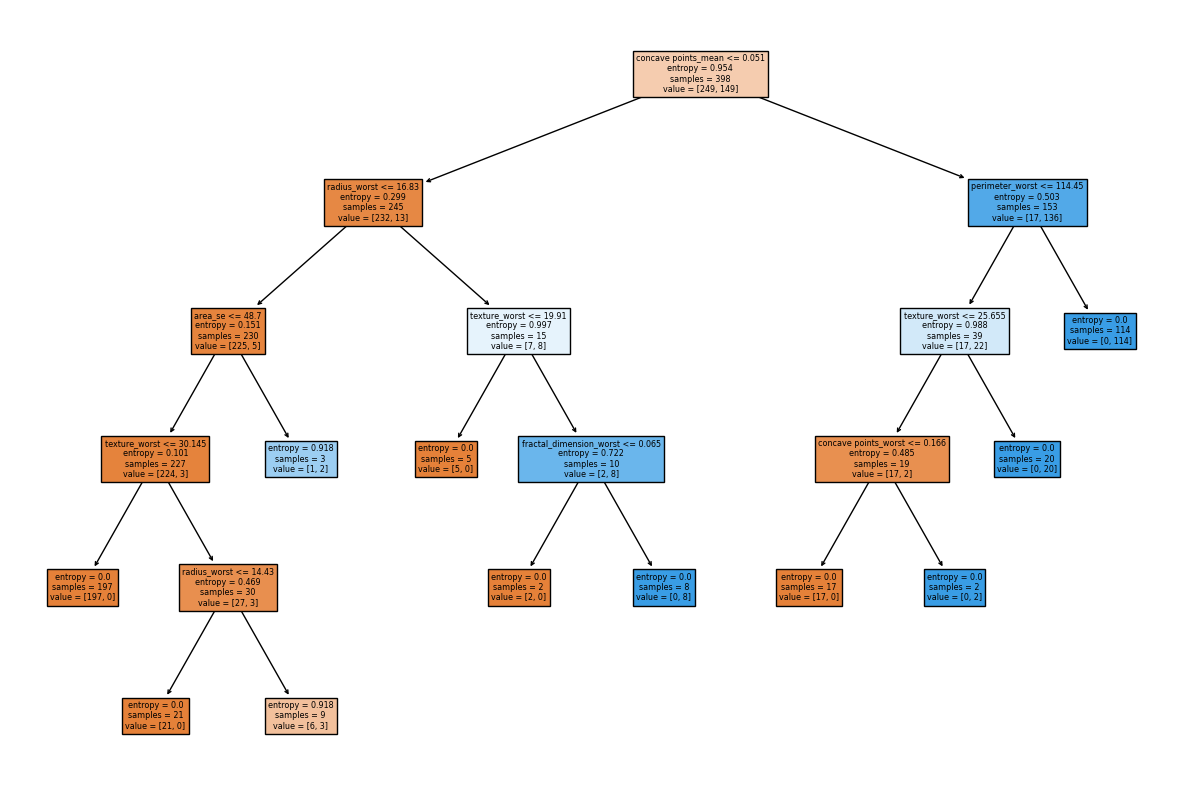

In [44]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf, filled=True, feature_names = x.columns)

#After hyperparameter optimization, we got this Good Tree. (Depth = 6)

In [45]:
#https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
pruning_path = dt_clf.cost_complexity_pruning_path(xtrain, ytrain) # clf = DecisionTreeClassifier
ccp_alpha_values = pruning_path.ccp_alphas

In [46]:
ccp_alpha_values

array([0.        , 0.01458594, 0.0181389 , 0.01942863, 0.02249811,
       0.02254598, 0.02317526, 0.05933369, 0.07364967, 0.0966387 ,
       0.57628768])

In [47]:
clfs_list = []  # save diffrent classifiers

for c in ccp_alpha_values:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=c)
    clf.fit(xtrain, ytrain)
    clfs_list.append(clf)

#we got some random values of ccp-alpha and those values will help to train the model.
#First, we created an object, then run a loop.
#ccp_alpha=c -> At first, the object we created wil be c=1st value of array from previous output=0, then c=0.01458594, then .....
#For each ccp-alpha value, it will create separate object through a loop.

In [48]:
clfs_list

# DecisionTreeClassifier(random_state=42) -> this is c=0.
#the second one DecisionTreeClassifier(ccp_alpha=0.014585942967809122, random_state=42) is c=0.01458594.


[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.014585942967809122, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.01813889685646639, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.019428626961936996, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.022498112473096667, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0225459777507582, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.023175262447669234, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.059333693848085844, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.073649668769294, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.09663869999075987, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.5762876765620236, random_state=42)]

In [49]:
train_scores = [ clf.score(xtrain, ytrain) for clf in clfs_list ]
test_scores = [ clf.score(xtest, ytest) for clf in clfs_list ]

#now we will train the model using this object. We used List Comprehension here. We are taking one by one and checking the score.
#The number of classifiers we have, the number of scores we will get. In this case, it is 11.

In [50]:
train_scores

[1.0,
 0.9597989949748744,
 0.9422110552763819,
 0.9396984924623115,
 0.9396984924623115,
 0.9396984924623115,
 0.9396984924623115,
 0.9246231155778895,
 0.9246231155778895,
 0.9246231155778895,
 0.6256281407035176]

In [51]:
test_scores

#testing scores are also 11.

[0.9415204678362573,
 0.9415204678362573,
 0.9298245614035088,
 0.9064327485380117,
 0.9064327485380117,
 0.9064327485380117,
 0.9064327485380117,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.631578947368421]

In [52]:
import matplotlib.pyplot as plt

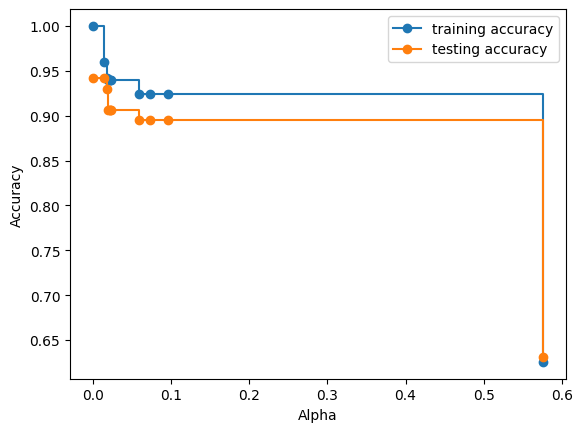

In [53]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

ax.plot(ccp_alpha_values, train_scores, marker='o', label="training accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values, test_scores, marker='o', label="testing accuracy", drawstyle="steps-post")
ax.legend()

#0.01 will be better (Training and Testing is equal here)

In [54]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [55]:
pred=clf.predict(xtest)
accuracy_score(ytest, pred)

0.9649122807017544

[Text(0.4230769230769231, 0.9, 'concave points_mean <= 0.051\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(0.15384615384615385, 0.7, 'radius_worst <= 16.83\ngini = 0.1\nsamples = 245\nvalue = [232, 13]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.043\nsamples = 230\nvalue = [225, 5]'),
 Text(0.23076923076923078, 0.5, 'texture_mean <= 16.19\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.6923076923076923, 0.7, 'texture_worst <= 20.405\ngini = 0.198\nsamples = 153\nvalue = [17, 136]'),
 Text(0.5384615384615384, 0.5, 'radius_worst <= 18.145\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6153846153846154, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8461538461538461, 0.5, 'area_worst <= 718.65\ngini = 0.096\nsamples = 139\n

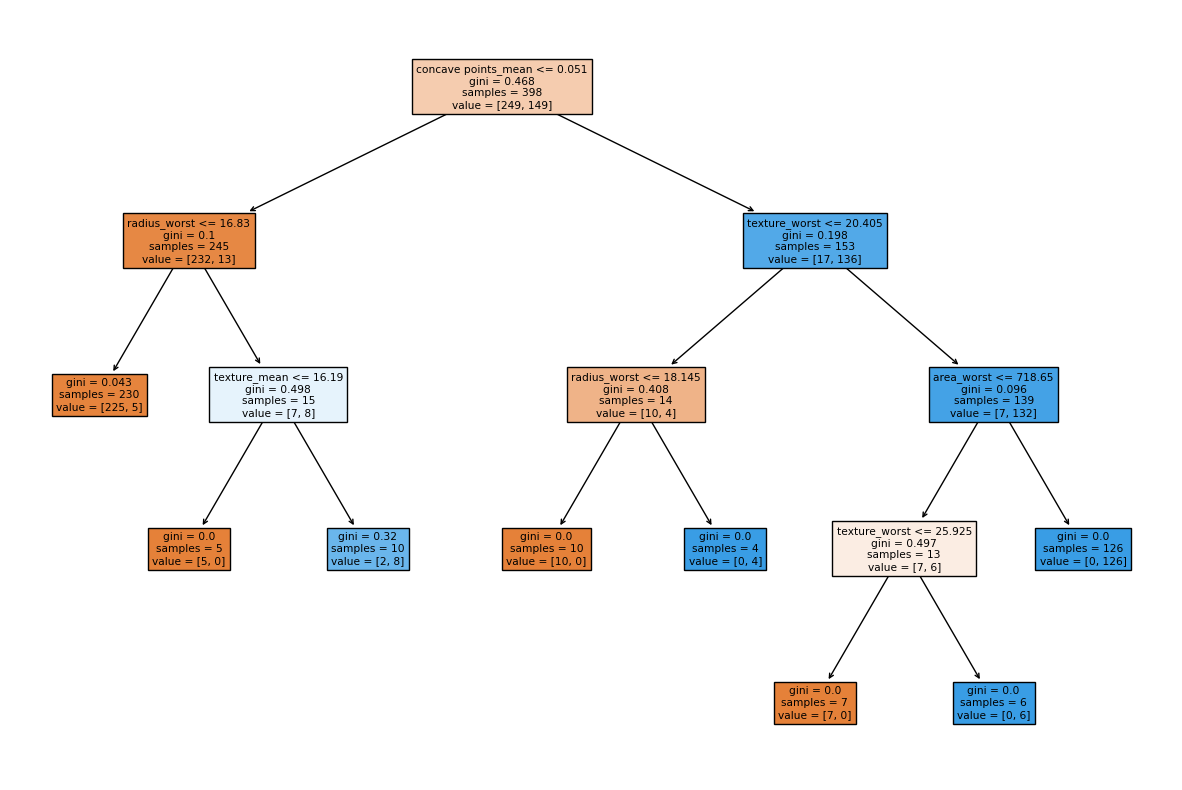

In [56]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names = x.columns)

#Less complex tree (Depth 5)

**Apply cost-complexity pruning (pre-pruning) to the Random Forest using the ccp_alpha parameter**

In [57]:
clf_rf= rf_random_search.best_estimator_
clf_rf

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       random_state=42)

In [58]:
# Get the best Random Forest estimator from the grid search
best_rf_estimator = rf_grid_search.best_estimator_

In [59]:
# Get the number of estimators (trees) in the best Random Forest model
n_estimators = best_rf_estimator.n_estimators


In [60]:
# Create a list to store different Random Forest classifiers with different ccp_alpha values
clfs_list_rf = []

In [61]:
# Save the different ccp_alpha values from the pruning path
ccp_alpha_values_rf = pruning_path.ccp_alphas

In [62]:
# Train and save different Random Forest classifiers with different ccp_alpha values
for ccp_alpha in ccp_alpha_values_rf:
    clf_rf = RandomForestClassifier(random_state=42, n_estimators=n_estimators, ccp_alpha=ccp_alpha)
    clf_rf.fit(xtrain, ytrain)
    clfs_list_rf.append(clf_rf)

In [63]:
# Calculate training and testing scores for each classifier in the list
train_scores_rf = [clf_rf.score(xtrain, ytrain) for clf_rf in clfs_list_rf]
test_scores_rf = [clf_rf.score(xtest, ytest) for clf_rf in clfs_list_rf]

In [64]:
# Choose the best classifier based on the highest test score

import numpy as np

best_rf_index = np.argmax(test_scores_rf)
best_rf_estimator_pruned = clfs_list_rf[best_rf_index]

In [65]:
# Make predictions on the test data using the best pruned Random Forest model
y_pred_rf_pruned = best_rf_estimator_pruned.predict(xtest)

In [66]:
# Calculate accuracy score of the best pruned Random Forest model
accuracy_rf_pruned = accuracy_score(ytest, y_pred_rf_pruned)

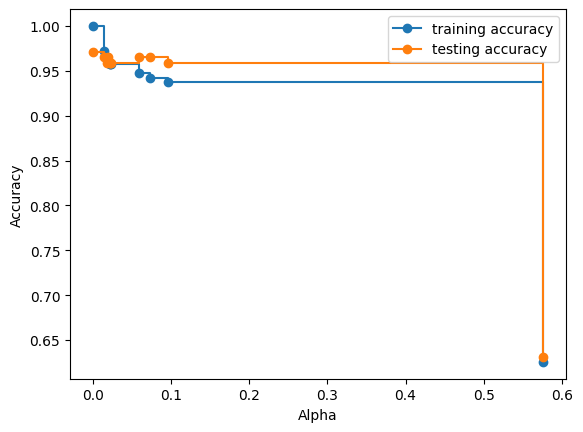

In [67]:
# Create a figure and axis
fig, ax = plt.subplots()

# Set labels for the plot
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

# Plot the training accuracy and testing accuracy
ax.plot(ccp_alpha_values_rf, train_scores_rf, marker='o', label="training accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values_rf, test_scores_rf, marker='o', label="testing accuracy", drawstyle="steps-post")

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

In [68]:
# Fit the Random Forest model with the best hyperparameters on the training data
best_rf_estimator.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       random_state=42)

In [69]:
# Make predictions on the test data using the best pruned Random Forest model
y_pred_rf_pruned = best_rf_estimator.predict(xtest)

In [70]:
# Calculate accuracy score of the best pruned Random Forest model
accuracy_rf_pruned = accuracy_score(ytest, y_pred_rf_pruned)

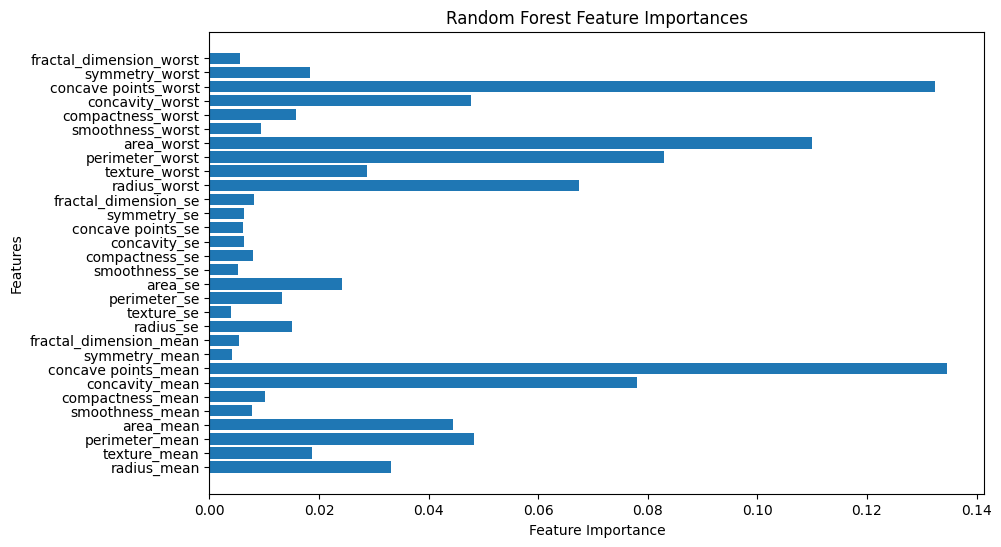

In [71]:
# Get feature importances from the best Random Forest estimator
feature_importances = best_rf_estimator.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(x.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.show()


**What about Random Forest in case of Post-Pruning?**

Random Forest is an ensemble learning method that uses decision trees as base estimators, similar to AdaBoost. However, unlike AdaBoost, Random Forest does not inherently support post-pruning.

In Random Forest, each tree in the ensemble is grown independently and fully expanded (without pruning) during the construction process. The randomization in Random Forest, such as bootstrapping and feature selection, helps reduce overfitting. Since the trees in Random Forest are relatively shallow and diverse, the risk of overfitting is already mitigated, and there is no need for post-pruning.

Post-pruning (tree pruning) is typically applied to single decision trees to reduce their complexity and prevent overfitting on the training data. It involves removing branches (nodes) from the fully grown tree that do not significantly contribute to improving predictive accuracy. However, as mentioned earlier, Random Forest does not require post-pruning because the aggregation of multiple diverse trees already achieves a good balance between bias and variance, making it less prone to overfitting.

In summary, **Random Forest does not utilize post-pruning** because it does not construct deep individual trees, and its ensemble approach inherently provides regularization and avoids overfitting. It is essential to tune hyperparameters related to the number of trees, max depth, min samples per leaf, etc., to optimize Random Forest's performance.

**XGBoost**

In [73]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode the target variable to numerical labels (0: Benign, 1: Malignant)
le = LabelEncoder()
y = le.fit_transform(y)


In [74]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.3)

In [75]:
# XGBoost in Normal Form
xgb_model = XGBClassifier(random_state=42)

In [76]:
# Fit the model on the training data
xgb_model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [77]:
# Make predictions on the test data
y_pred_xgb = xgb_model.predict(xtest)

In [78]:
# Calculate accuracy
accuracy_xgb = accuracy_score(ytest, y_pred_xgb)

print("Accuracy using XGBoost in Normal Form:", accuracy_xgb)

Accuracy using XGBoost in Normal Form: 0.9824561403508771


**XGBoost with Hyperparameter Optimization (Pre-Pruning) using Grid Search**

In [79]:
# Define hyperparameters for XGBoost with pre-pruning
xgb_params_pre_prune = {
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3, 4]
}

In [80]:
# XGBoost with GridSearchCV for pre-pruning
xgb_grid_search_pre_prune = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=xgb_params_pre_prune, cv=5)
xgb_grid_search_pre_prune.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3, 4]})

In [81]:
# Get the best XGBoost estimator from GridSearchCV for pre-pruning
best_xgb_estimator_pre_prune = xgb_grid_search_pre_prune.best_estimator_

In [82]:
# Make predictions on the test data using the best XGBoost model for pre-pruning
y_pred_xgb_pre_prune = best_xgb_estimator_pre_prune.predict(xtest)

In [83]:
# Calculate accuracy for pre-pruning
accuracy_xgb_pre_prune_grid = accuracy_score(ytest, y_pred_xgb_pre_prune)

In [84]:
print("Best Parameters using GridSearchCV for XGBoost with Pre-Pruning:", xgb_grid_search_pre_prune.best_params_)
print("Accuracy using XGBoost with Pre-Pruning:", accuracy_xgb_pre_prune_grid)

Best Parameters using GridSearchCV for XGBoost with Pre-Pruning: {'max_depth': 4, 'min_child_weight': 3}
Accuracy using XGBoost with Pre-Pruning: 0.9766081871345029


**XGBoost with Hyperparameter Optimization (Pre-Pruning) using Randomized Search**

In [85]:
# Define hyperparameters for XGBoost with pre-pruning (Randomized Search)
xgb_params_pre_prune = {
    'max_depth': np.arange(3, 10),
    'min_child_weight': np.arange(1, 10),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1)
}

In [86]:
# XGBoost with RandomizedSearchCV for pre-pruning
xgb_random_search_pre_prune = RandomizedSearchCV(estimator=XGBClassifier(random_state=42), param_distributions=xgb_params_pre_prune, cv=5, n_iter=50, random_state=42)
xgb_random_search_pre_prune.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_weight': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   random_state=42)

In [87]:
# Get the best XGBoost estimator from RandomizedSearchCV for pre-pruning
best_xgb_estimator_pre_prune_randomized = xgb_random_search_pre_prune.best_estimator_

In [88]:
# Make predictions on the test data using the best XGBoost model for pre-pruning
y_pred_xgb_pre_prune_randomized = best_xgb_estimator_pre_prune_randomized.predict(xtest)


In [89]:
# Calculate accuracy for pre-pruning
accuracy_xgb_pre_prune_randomized = accuracy_score(ytest, y_pred_xgb_pre_prune_randomized)

print("Best Parameters using RandomizedSearchCV for XGBoost with Pre-Pruning:", xgb_random_search_pre_prune.best_params_)
print("Accuracy using XGBoost with Pre-Pruning:", accuracy_xgb_pre_prune_randomized)

Best Parameters using RandomizedSearchCV for XGBoost with Pre-Pruning: {'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 9, 'gamma': 0.1, 'colsample_bytree': 0.7999999999999999}
Accuracy using XGBoost with Pre-Pruning: 0.9883040935672515


**XGBoost with Hyperparameter Optimization (Post-Pruning) using Grid Search**

In [90]:
# Define hyperparameters for XGBoost with post-pruning (Grid Search)
xgb_params_post_prune = {
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

In [91]:
# XGBoost with GridSearchCV for post-pruning
xgb_grid_search_post_prune = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=xgb_params_post_prune, cv=5)
xgb_grid_search_post_prune.fit(xtrain, ytrain)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3, 4],
                         'subsample': [0.7, 0.8, 0.9]})

In [92]:
# Get the best XGBoost estimator from GridSearchCV for post-pruning
best_xgb_estimator_post_prune = xgb_grid_search_post_prune.best_estimator_


In [93]:
# Make predictions on the test data using the best XGBoost model for post-pruning
y_pred_xgb_post_prune = best_xgb_estimator_post_prune.predict(xtest)

In [94]:
# Calculate accuracy for post-pruning
accuracy_xgb_post_prune_grid = accuracy_score(ytest, y_pred_xgb_post_prune)

print("Best Parameters using GridSearchCV for XGBoost with Post-Pruning:", xgb_grid_search_post_prune.best_params_)
print("Accuracy using XGBoost with Post-Pruning:", accuracy_xgb_post_prune_grid)

Best Parameters using GridSearchCV for XGBoost with Post-Pruning: {'colsample_bytree': 0.9, 'gamma': 0.2, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.9}
Accuracy using XGBoost with Post-Pruning: 0.9707602339181286


**XGBoost with Hyperparameter Optimization (Post-Pruning) using Randomized Search**

In [95]:
# Define hyperparameters for XGBoost with post-pruning
xgb_params_post_prune = {
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_lambda': [0, 0.1, 0.2, 0.3, 0.4]
}

In [96]:
# XGBoost with RandomizedSearchCV for post-pruning
xgb_random_search_post_prune = RandomizedSearchCV(estimator=XGBClassifier(random_state=42), param_distributions=xgb_params_post_prune, cv=5, n_iter=10, random_state=42)
xgb_random_search_post_prune.fit(xtrain, ytrain)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4],
                                        'reg_lambda': [0, 0.1, 0.2, 0.3, 0.4]},
                   random_state=42)

In [97]:
# Get the best XGBoost estimator from RandomizedSearchCV for post-pruning
best_xgb_estimator_post_prune = xgb_random_search_post_prune.best_estimator_

In [98]:
# Make predictions on the test data using the best XGBoost model for post-pruning
y_pred_xgb_post_prune = best_xgb_estimator_post_prune.predict(xtest)

In [99]:
# Calculate accuracy for post-pruning
accuracy_xgb_post_prune_randomized = accuracy_score(ytest, y_pred_xgb_post_prune)

In [100]:
print("Best Parameters using RandomizedSearchCV for XGBoost with Post-Pruning:", xgb_random_search_post_prune.best_params_)
print("Accuracy using XGBoost with Post-Pruning:", accuracy_xgb_post_prune_randomized)

Best Parameters using RandomizedSearchCV for XGBoost with Post-Pruning: {'reg_lambda': 0.3, 'reg_alpha': 0.3, 'gamma': 0}
Accuracy using XGBoost with Post-Pruning: 0.9766081871345029


**Before Performance vs After Performance**

In [101]:
# Print the accuracies for pre-pruning and post-pruning
print("Accuracy using XGBoost in Normal Form:", accuracy_xgb)
print("Accuracy of XGBoost with Pre-Pruning (Grid Search):", accuracy_xgb_pre_prune_grid)
print("Accuracy of XGBoost with Pre-Pruning (Randomized Search):", accuracy_xgb_pre_prune_randomized)
print("Accuracy of XGBoost with Post-Pruning (Grid Search):", accuracy_xgb_post_prune_grid)
print("Accuracy of XGBoost with Post-Pruning (Randomized Search):", accuracy_xgb_post_prune_randomized)

Accuracy using XGBoost in Normal Form: 0.9824561403508771
Accuracy of XGBoost with Pre-Pruning (Grid Search): 0.9766081871345029
Accuracy of XGBoost with Pre-Pruning (Randomized Search): 0.9883040935672515
Accuracy of XGBoost with Post-Pruning (Grid Search): 0.9707602339181286
Accuracy of XGBoost with Post-Pruning (Randomized Search): 0.9766081871345029


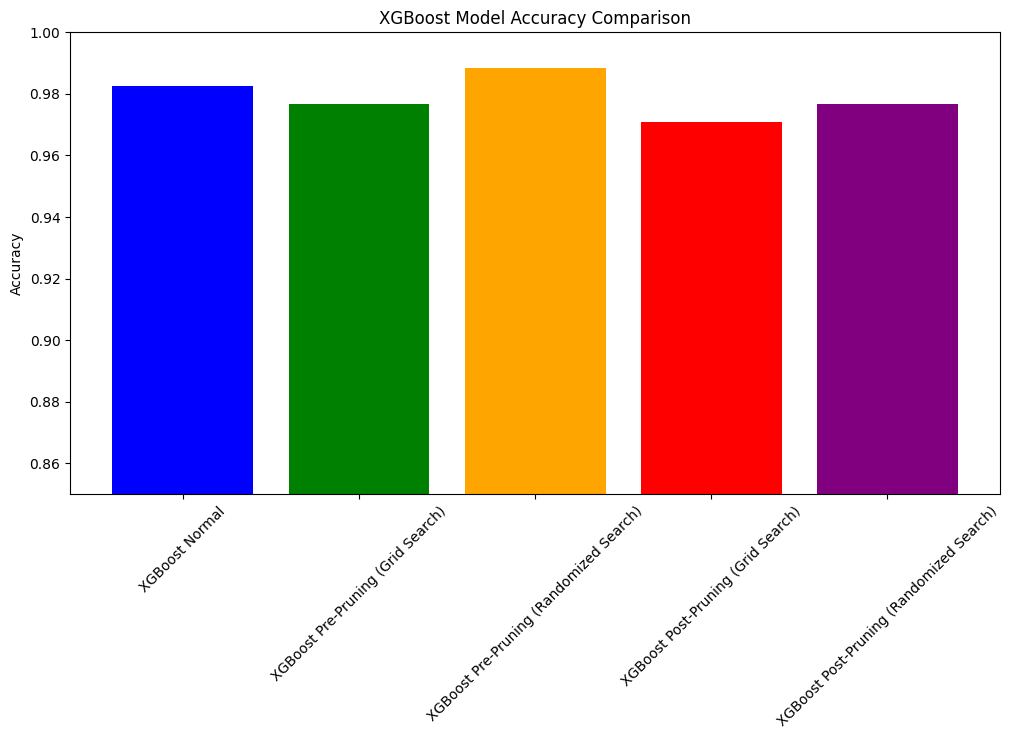

In [102]:
# Define the accuracies for different scenarios
accuracies = [accuracy_xgb,
              accuracy_xgb_pre_prune_grid,
              accuracy_xgb_pre_prune_randomized,
              accuracy_xgb_post_prune_grid,
              accuracy_xgb_post_prune_randomized]

# Define the labels for different scenarios
labels = ['XGBoost Normal',
          'XGBoost Pre-Pruning (Grid Search)',
          'XGBoost Pre-Pruning (Randomized Search)',
          'XGBoost Post-Pruning (Grid Search)',
          'XGBoost Post-Pruning (Randomized Search)']

# Plotting the Accuracies for all scenarios
plt.figure(figsize=(12, 6))
plt.bar(labels, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.title('XGBoost Model Accuracy Comparison')
plt.ylim(0.85, 1.0)
plt.xticks(rotation=45)
plt.show()


<Figure size 2000x1000 with 0 Axes>

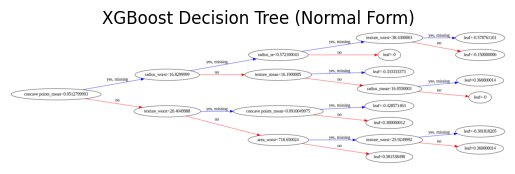

In [103]:
from xgboost import plot_tree

# XGBoost in Normal Form
# Plot the tree of the XGBoost model
plt.figure(figsize=(20, 10)) #width, height
plot_tree(xgb_model, num_trees=0, rankdir='LR')
plt.title("XGBoost Decision Tree (Normal Form)")
plt.show()


Text(0.5, 1.0, 'XGBoost Pre-Pruning (Grid Search)')

<Figure size 2000x1000 with 0 Axes>

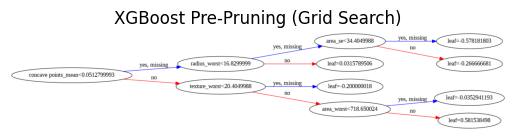

In [104]:
# XGBoost with Pre-Pruning (Grid Search)
plt.figure(figsize=(20, 10))
plot_tree(best_xgb_estimator_pre_prune, num_trees=0, rankdir='LR')
plt.title("XGBoost Pre-Pruning (Grid Search)")

<Figure size 2000x1000 with 0 Axes>

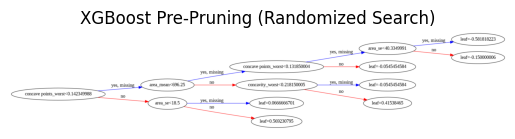

<Figure size 2000x1000 with 0 Axes>

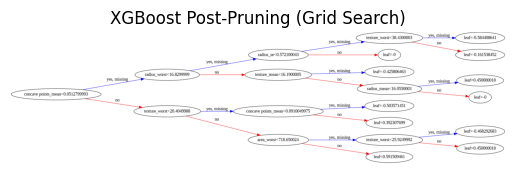

<Figure size 2000x1000 with 0 Axes>

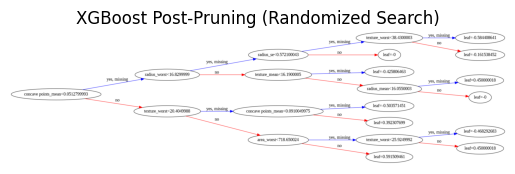

In [105]:
# XGBoost with Pre-Pruning (Randomized Search)
plt.figure(figsize=(20, 10))
plot_tree(best_xgb_estimator_pre_prune_randomized, num_trees=0, rankdir='LR')
plt.title("XGBoost Pre-Pruning (Randomized Search)")

# XGBoost with Post-Pruning (Grid Search)
plt.figure(figsize=(20, 10))
plot_tree(best_xgb_estimator_post_prune, num_trees=0, rankdir='LR')
plt.title("XGBoost Post-Pruning (Grid Search)")

# XGBoost with Post-Pruning (Randomized Search)
plt.figure(figsize=(20, 10))
plot_tree(best_xgb_estimator_post_prune, num_trees=0, rankdir='LR')
plt.title("XGBoost Post-Pruning (Randomized Search)")

plt.show()

**ADA Boost**

In [106]:
# AdaBoost in Normal
from sklearn.ensemble import AdaBoostClassifier


In [107]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.3)

In [108]:
# Create and train the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(xtrain, ytrain)

AdaBoostClassifier(random_state=42)

In [109]:
# Make predictions on the test data
y_pred_adaboost = adaboost_model.predict(xtest)

In [110]:
# Calculate accuracy
accuracy_adaboost = accuracy_score(ytest, y_pred_adaboost)
print("Accuracy using AdaBoost in Normal Form:", accuracy_adaboost)

Accuracy using AdaBoost in Normal Form: 0.9766081871345029


**AdaBoost with Hyperparameter Optimization (Pre-Pruning) using GridSearchCV**

In [111]:
# Define hyperparameters for the AdaBoost model
adaboost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'base_estimator': [DecisionTreeClassifier(max_depth=d, random_state=42) for d in [None, 10, 20, 30]],
}

In [112]:
# Create and train the AdaBoost model with GridSearchCV for pre-pruning
adaboost_pre_prune_grid = GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
                                       param_grid=adaboost_params, cv=5)
adaboost_pre_prune_grid.fit(xtrain, ytrain)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=42),
                                            DecisionTreeClassifier(max_depth=10,
                                                                   random_state=42),
                                            DecisionTreeClassifier(max_depth=20,
                                                                   random_state=42),
                                            DecisionTreeClassifier(max_depth=30,
                                                                   random_state=42)],
                         'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]})

In [113]:
# Get the best AdaBoost model
adaboost_pre_prune_best = adaboost_pre_prune_grid.best_estimator_

In [114]:
# Make predictions on the test data
y_pred_adaboost_pre_prune_grid = adaboost_pre_prune_best.predict(xtest)


In [115]:
# Calculate accuracy
accuracy_adaboost_pre_prune_grid = accuracy_score(ytest, y_pred_adaboost_pre_prune_grid)
print("Accuracy using AdaBoost with Pre-Pruning (GridSearchCV):", accuracy_adaboost_pre_prune_grid)

Accuracy using AdaBoost with Pre-Pruning (GridSearchCV): 0.9298245614035088


**AdaBoost with Hyperparameter Optimization (Pre-Pruning) using RandomizedSearchCV**

In [116]:
from scipy.stats import randint  # Import randint from scipy.stats

# Define hyperparameters for the AdaBoost model
adaboost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'base_estimator': [DecisionTreeClassifier(max_depth=d, random_state=42) for d in [None, 10, 20, 30]],
}

In [117]:
# Create and train the AdaBoost model with RandomizedSearchCV for pre-pruning
adaboost_pre_prune_random = RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=42),
                                              param_distributions=adaboost_params,
                                              n_iter=100, cv=5, random_state=42)
adaboost_pre_prune_random.fit(xtrain, ytrain)


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'base_estimator': [DecisionTreeClassifier(random_state=42),
                                                           DecisionTreeClassifier(max_depth=10,
                                                                                  random_state=42),
                                                           DecisionTreeClassifier(max_depth=20,
                                                                                  random_state=42),
                                                           DecisionTreeClassifier(max_depth=30,
                                                                                  random_state=42)],
                                        'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42)

In [118]:
# Get the best AdaBoost model
adaboost_pre_prune_random_best = adaboost_pre_prune_random.best_estimator_

In [119]:
# Make predictions on the test data
y_pred_adaboost_pre_prune_random = adaboost_pre_prune_random_best.predict(xtest)

In [120]:
# Calculate accuracy
accuracy_adaboost_pre_prune_random = accuracy_score(ytest, y_pred_adaboost_pre_prune_random)
print("Accuracy using AdaBoost with Pre-Pruning (RandomizedSearchCV):", accuracy_adaboost_pre_prune_random)

Accuracy using AdaBoost with Pre-Pruning (RandomizedSearchCV): 0.9298245614035088


**AdaBoost with Hyperparameter Optimization (Post-Pruning) using GridSearchCV and RadomizedCV**

In the context of AdaBoost, **there is no concept of post-pruning**. AdaBoost works by iteratively adding weak learners (e.g., decision stumps) to the ensemble, and it focuses on adjusting the weights of misclassified samples to improve performance.

Post-pruning, also known as tree pruning, is a concept applicable to decision trees, where a full tree is first grown and then unnecessary branches (nodes) are removed to avoid overfitting. However, AdaBoost uses decision stumps as weak learners, and they are typically small trees with only one split, so post-pruning is not needed or applicable in the context of AdaBoost.

Therefore, in the context of AdaBoost, you only need to perform hyperparameter optimization for pre-pruning using GridSearchCV and RandomizedSearchCV to find the best hyperparameters for the base estimator (e.g., decision stumps) and the AdaBoost ensemble itself. You can use the code provided in my previous response for pre-pruning optimization with GridSearchCV and RandomizedSearchCV.



**Performance**

In [121]:
# Print the accuracies for pre-pruning and post-pruning
print("Accuracy using ADABoost in Normal Form:", accuracy_adaboost)
print("Accuracy of ADABoost with Pre-Pruning (Grid Search):", accuracy_adaboost_pre_prune_grid)
print("Accuracy of ADABoost with Pre-Pruning (Randomized Search):", accuracy_adaboost_pre_prune_random)

Accuracy using ADABoost in Normal Form: 0.9766081871345029
Accuracy of ADABoost with Pre-Pruning (Grid Search): 0.9298245614035088
Accuracy of ADABoost with Pre-Pruning (Randomized Search): 0.9298245614035088


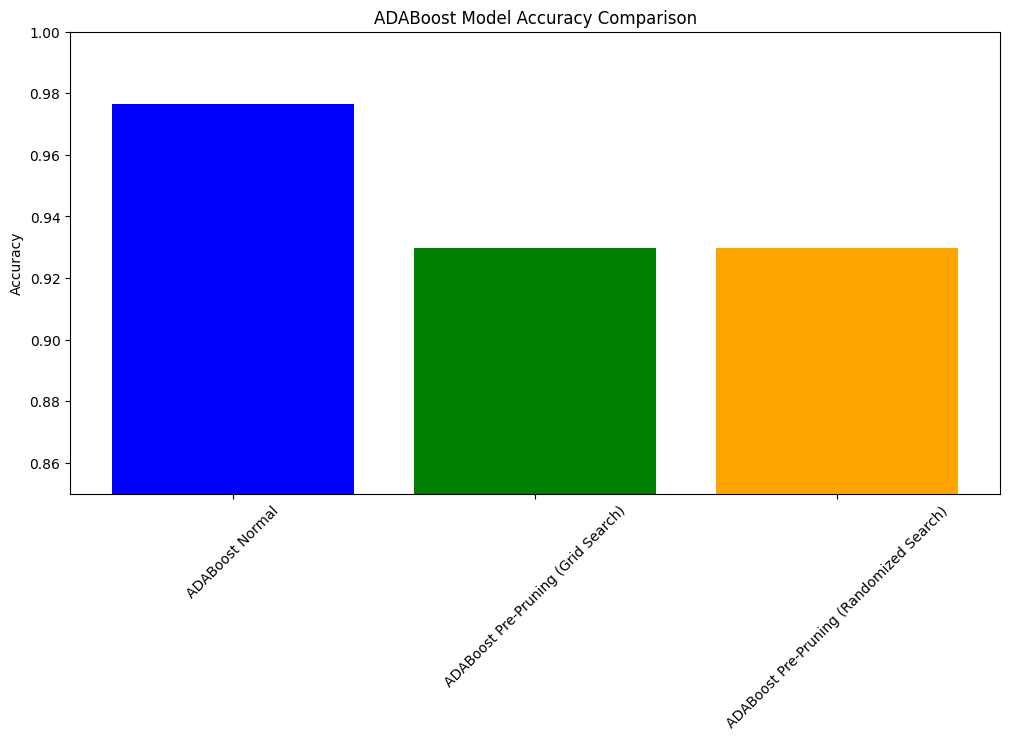

In [122]:
# Define the accuracies for different scenarios
accuracies = [accuracy_adaboost,
              accuracy_adaboost_pre_prune_grid,
              accuracy_adaboost_pre_prune_random]

# Define the labels for different scenarios
labels = ['ADABoost Normal',
          'ADABoost Pre-Pruning (Grid Search)',
          'ADABoost Pre-Pruning (Randomized Search)']

# Plotting the Accuracies for all scenarios
plt.figure(figsize=(12, 6))
plt.bar(labels, accuracies, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('ADABoost Model Accuracy Comparison')
plt.ylim(0.85, 1.0)
plt.xticks(rotation=45)
plt.show()


Since AdaBoost is an ensemble method that uses decision stumps as weak learners, pre-pruning is performed during the construction of individual decision stumps rather than post-pruning. Therefore, there is no specific tree to plot for AdaBoost with pre-pruning.

However, we can still visualize the performance of AdaBoost with different ccp_alpha values (pre-pruning) using a plot similar to what we did for Decision Tree. We can compare the accuracy scores of different ccp_alpha values for both Grid Search and Randomized Search.

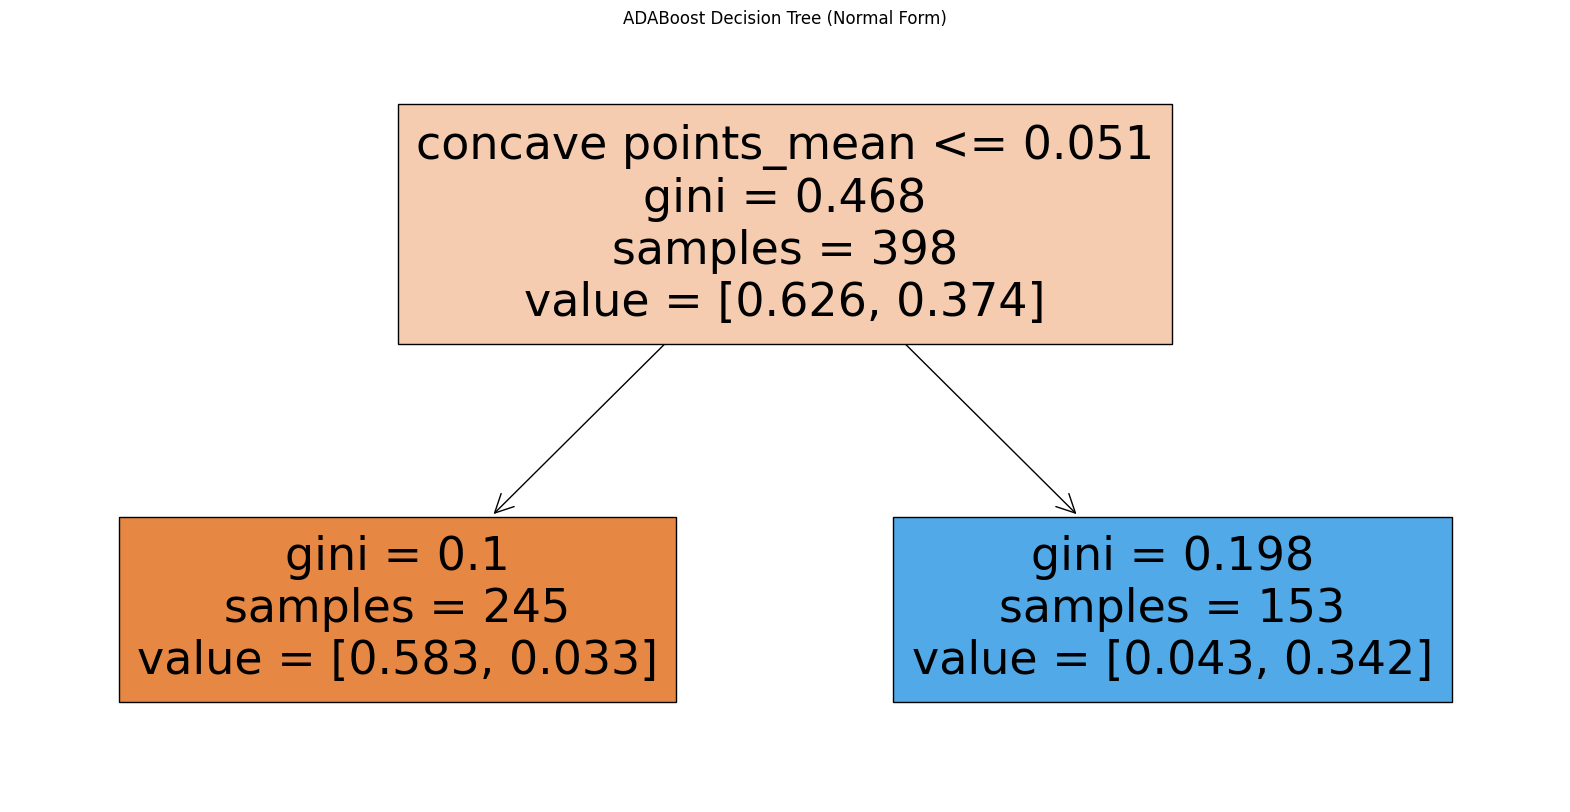

In [123]:
from sklearn.tree import plot_tree

# ADABoost in Normal Form
# Plot the tree of the ADABoost model
plt.figure(figsize=(20, 10))
plot_tree(adaboost_model.estimators_[0], filled=True, feature_names=x.columns)
plt.title("ADABoost Decision Tree (Normal Form)")
plt.show()


Since AdaBoost does not support post-pruning, **there is no tree to plot** after training the AdaBoost model with pre-pruning (GridSearchCV). The base estimator in AdaBoost is typically a decision tree with limited depth (weak learner), and there is no need for post-pruning in this context.

As I have already obtained the best AdaBoost model with pre-pruning and trained it on the data, there is no decision tree to plot because AdaBoost uses the weighted combination of multiple weak learners (e.g., decision trees) rather than a single decision tree. Therefore, the tree plot would not be applicable to the final AdaBoost model.

We can evaluate the performance of the best AdaBoost model using the accuracy score as we have already done.